<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: machine learning practice with scikit-learn

---

We are going to use datasets about wine.

There are two datasets; one for white wines, one for red wines.

For information about the dataset look here:

- [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Data description](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)

## Part 2: Classification

For this exercise we'll try and predict whether a wine is red or white based on its details.

#### 1: Read in *both* the white and red wine datasets into two DataFrames

In [1]:
import pandas as pd

df_red = pd.read_csv("data/winequality-red.csv")
df_white = pd.read_csv("data/winequality-white.csv")

#### 2: In both DataFrames create a 'colour' column (with values 'white' and 'red' respectively)

In [2]:
df_white["colour"] = "white"
df_red["colour"] = "red"

#### 3: Create a single dataset by concatenating (hint, hint) them together

In [3]:
df = pd.concat([df_red, df_white])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### 4: Do some exploration of your two classes

You may be interested in questions like:

- what proportion of wines are red vs. white?
- what is the breakdown of our variables by class? (i.e. what does alcohol content, citric acid etc. look like for white vs. red wines?)

In [4]:
#Number of each type of wine
df['colour'].value_counts()

white    4898
red      1599
Name: colour, dtype: int64

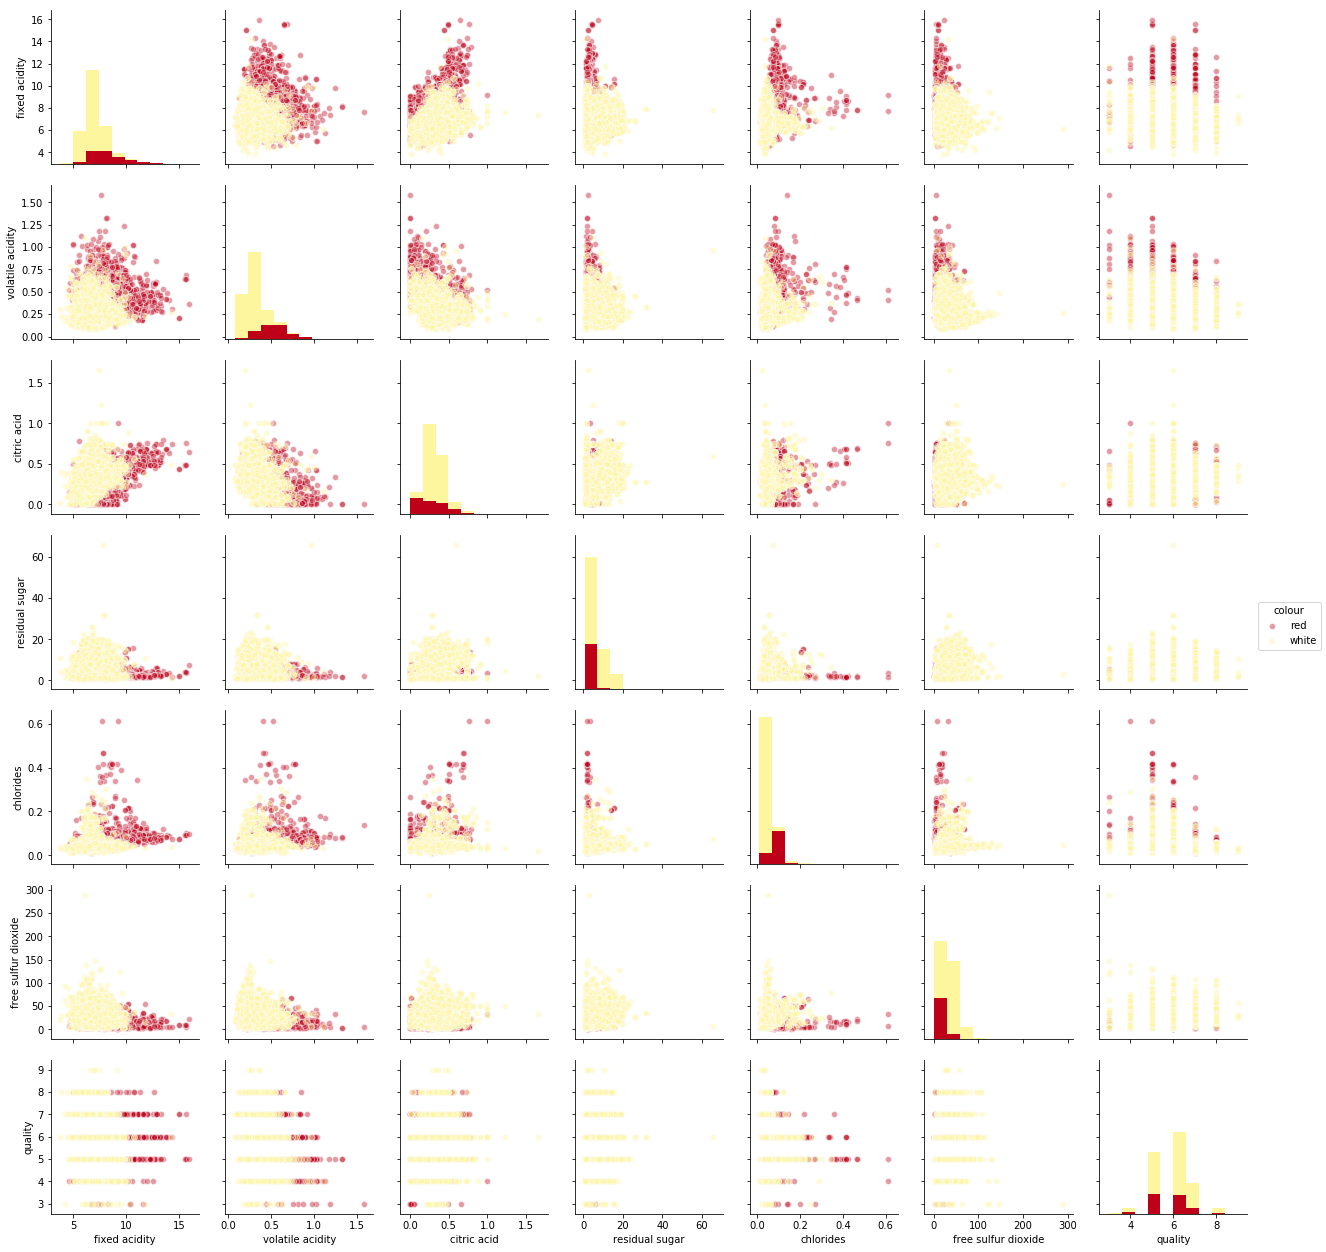

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color scheme for plots - https://xkcd.com/color/rgb/ (for named colors)
color_list = ["scarlet", "buff"]
sns.palplot(sns.xkcd_palette(color_list))
color_list_palette = sns.xkcd_palette(color_list)
sns.set_palette(color_list_palette)

%matplotlib inline

sns.pairplot(df[list(df.columns[:6]) + ["quality", "colour"]],
             hue="colour",
             plot_kws={"alpha": 0.4});


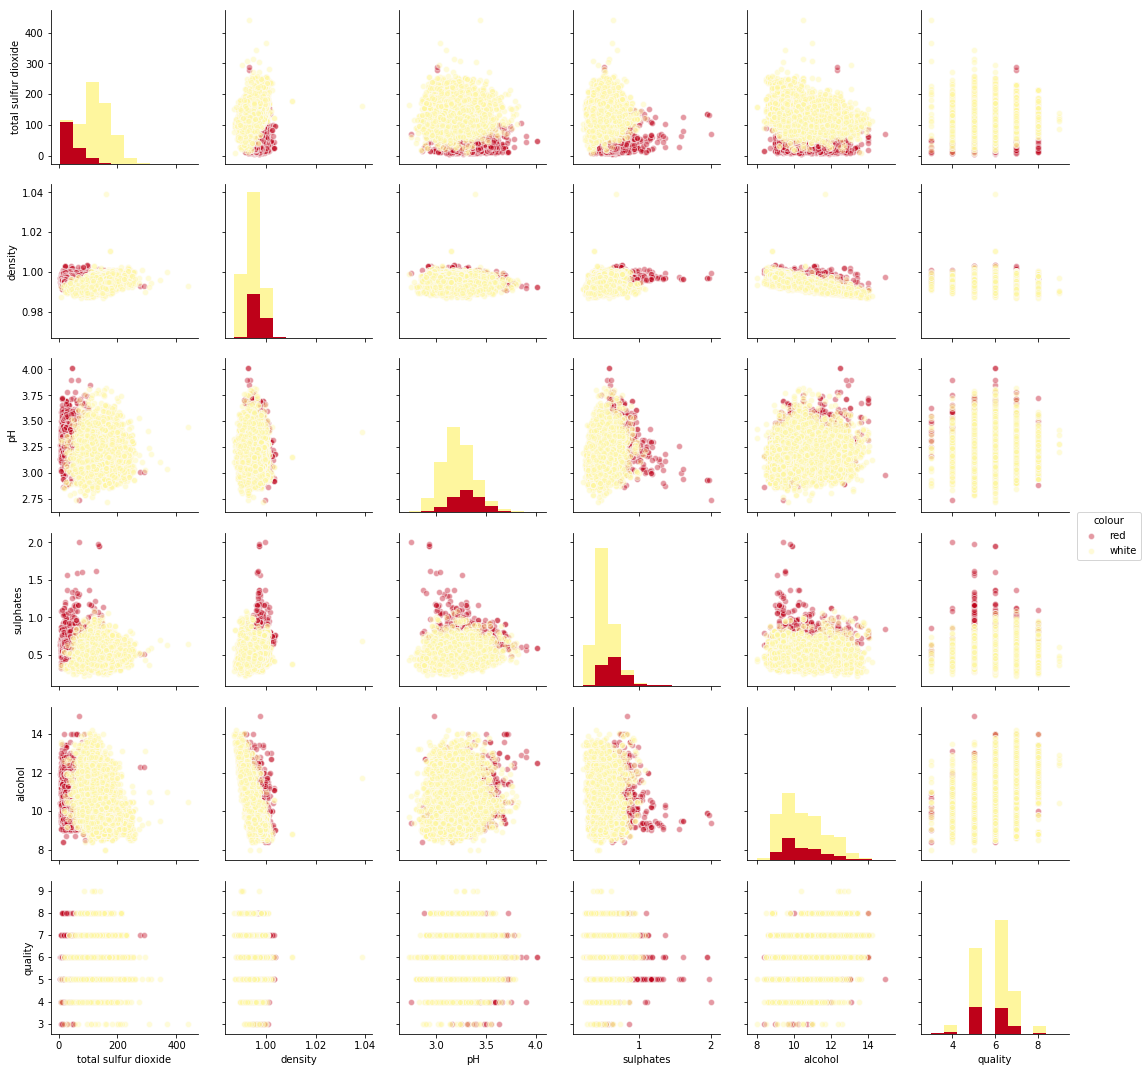

In [6]:
sns.pairplot(df[list(df.columns[6:])],
             hue="colour",
             plot_kws={"alpha": 0.4});

[ss]: nice use of colours! sometimes you might need to explicitly map the category to the colour (especially if you have multiple categories and plots) as it can work unexpectedly

### Comments (DA)

I like how you've deviated from the vanilla options in many cases - it makes for more interesting reading!

#### 5: Take 3-4 of the columns of interest and create a train-test split

Using the make-up of classes investigated above as an indication - should you or shouldn't you stratify your samples in the train-test split?

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df[["fixed acidity", "chlorides", "total sulfur dioxide"]]
y = df["colour"]

# Set target to a numeric value for model
y_binary = y.map({"red": 1, "white": 0})

# Include stratify as classes are imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, stratify=y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))

4547 1950


In [8]:
""" Note an alternative way of creating binary values for target is to do:
from sklearn.preprocessing import LabelBinarizer
y2 = LabelBinarizer().fit_transform(y).ravel()
""";

[ss]: yes usually this is the approach when using vectors -> neural networks, depending on numpy arrays etc.

#### 6: Choose to fit either a logistic regression or a KNN classifier. What is the cross-validated accuracy of your chosen classifier?

You might have noticed the classes are skewed - use an appropriate metric for evaluation

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=7)
accuracy_scores = cross_val_score(model, X_train, y_train, scoring="f1")

print(accuracy_scores)
print(np.mean(accuracy_scores))

[0.8583691  0.84375    0.85006878]
0.8507292915011226


#### 7: Use grid search to optimise your model and get the optimal hyperparameter value

- look at the best score of your grid search
- look at the best hyperparameter

In [10]:
# Do a grid search for best k value of knn model
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'n_neighbors': [3,5,7,9,11,13,15]},
                    cv=10,
                    scoring='f1',
                    return_train_score=True)

grid.fit(X_train,y_train);

In [11]:
grid.best_score_

0.8599300168485423

In [12]:
grid.best_params_

{'n_neighbors': 13}

#### 8: Use the "best estimator" from your grid search to get predictions on your test set

In [13]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_pred.shape

(1950,)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}\tPrecision: {prec}\tRecall: {rec}\tF-1: {f1}")

Accuracy: 0.9307692307692308	Precision: 0.9039812646370023	Recall: 0.8041666666666667	F-1: 0.8511576626240351


#### 10: Look at your model's confusion matrix to see where it made errors

In [15]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a normalized table
cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print(cm)

[[0.97210884 0.02789116]
 [0.19583333 0.80416667]]


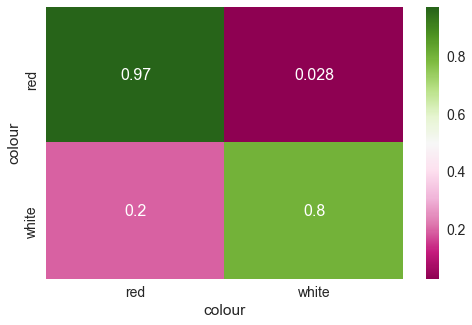

In [16]:
# Visualise the confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

array = cm
s = conf_matrix.shape[0]
r = df.groupby('colour').agg(['count']).index

df_cm = pd.DataFrame(array, index=r, columns=r)

plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm,cmap="PiYG", annot=True,annot_kws={"size": 16});# font size

I.e.  20% of the time when the model predicts white, it's wrong and the wine is actually red

and  3% of the time when the model predicts red, it's wrong and the wine is actually white

[ss]: labels super helpful, looks good!

### Comments (DA)

Great work, good use of commentary and as I said I like how you went the extra mile to make your visualisations look less standard, and more informative.